In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dados Simulados
# 'Alta Qualidade' tende a ter diametro maior e dureza mais alta
# 'Baixa Qualidade' tem o diametro menor e dureza mais baixa
np.random.seed(42)

# loc é o parametro que define a média (ou o centro) da distribuição
# scale é o parametro que define o desvio padrão da distribuição
# size é o parametro que define a forma (dimensôes) do array que será gerado
data_alta = np.random.normal(loc=[9, 0.8], scale=[0.5, 0.1], size=(100, 2))
data_baixa = np.random.normal(loc=[7, 0.5], scale=[0.5, 0.1], size=(100, 2))
#print(data_alta)


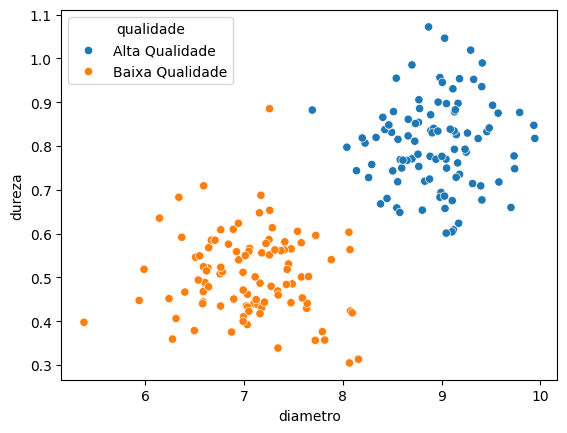

In [3]:
df_alta = pd.DataFrame(data_alta, columns=['diametro', 'dureza'])
df_baixa = pd.DataFrame(data_baixa, columns=['diametro', 'dureza'])

df_alta['qualidade'] = 'Alta Qualidade'
df_baixa['qualidade'] = 'Baixa Qualidade'

df = pd.concat([df_alta, df_baixa], ignore_index=True)

# Vizualização dos dados
sns.scatterplot(data=df, x='diametro', y='dureza', hue='qualidade')
plt.show()

In [ ]:
# Separação de X e y
X = df[['diametro', 'dureza']]
y = df['qualidade']
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )
#Criação e treinamento do modelo SVM com um kernel não-linear
# O 'rbf' (Radial Basis Function) é um kernel muito comum
svm_model = SVC(kernel='rbf', C=1.0, gamma="scale")
svm_model.fit(X_train, y_train)

print("--- Treinamento do Modelo SVM Concluído ---")

#Fazer a previsão para uma nova maçã
nova_maca =pd.DataFrame([[8.5, 0.5]], columns=['diametro', 'dureza'])
previsao = svm_model.predict(nova_maca)

print(f"\nCaracterísticas da nova maçã: Diâmetro = ")

